# Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline

# reading csv files

In [5]:

# Path to the data folder relative to the notebooks folder
folder_path = os.path.join('..','data')

# Construct the pattern to match all CSV files in the folder
pattern = os.path.join(folder_path, '*.csv')

# Use glob.glob to find all files matching the pattern
csv_files = glob.glob(pattern)

# Print the list of CSV file paths
for csv_file in csv_files:
    print(csv_file)
    # print(csv_file.split('\\')[-1].split('.')[0])
    



..\data\colors.csv
..\data\inventories.csv
..\data\inventory_parts.csv
..\data\inventory_sets.csv
..\data\parts.csv
..\data\part_categories.csv
..\data\sets.csv
..\data\themes.csv


In [6]:
# Dictionary to hold your dataframes
dataframes = {}

for file_path in csv_files:
    # Extract the file name without extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    # Read the CSV file and assign it to a key in the dictionary
    dataframes[file_name] = pd.read_csv(file_path)

for key,value in dataframes.items():
    print(key)
    print(value.head())
    print('-----------------------')

# Dictionary hold all those csv files,if want to call colors.csv , use dataframes['colors']
dataframes['colors']

colors
   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
-----------------------
inventories
   id  version set_num
0   1        1  7922-1
1   3        1  3931-1
2   4        1  6942-1
3  15        1  5158-1
4  16        1   903-1
-----------------------
inventory_parts
   inventory_id     part_num  color_id  quantity is_spare
0             1     48379c01        72         1        f
1             1        48395         7         1        f
2             1     mcsport6        25         1        f
3             1       paddle         0         1        f
4             3  11816pr0005        78         1        f
-----------------------
inventory_sets
   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  7

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


# check csv files

#### inventories table

In [7]:
dataframes['inventories'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [8]:
dataframes['inventories']['id'].nunique() # id is unique

11681

In [9]:
dataframes['inventories']['set_num'].nunique() # set_num is not unique

11670

In [10]:
# set_num + version is unique, so each set_num + version has an unique id in this inventories table
dataframes['inventories'][dataframes['inventories'].duplicated(['set_num','version'], keep=False)] 

,id,version,set_num


#### inventory_sets

In [11]:
dataframes['inventory_sets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB


In [12]:
dataframes['inventory_sets']['inventory_id'].nunique() # inventory_id is not unique

589

In [13]:
dataframes['inventory_sets']['inventory_id'].value_counts()

2514    30
6174    24
9926    24
7881    24
6702    24
        ..
9765     1
6034     1
4719     1
4666     1
1791     1
Name: inventory_id, Length: 589, dtype: int64

In [17]:
# check 2514 in inventories table
dataframes['inventories'][dataframes['inventories']['id'] == 2514]

,id,version,set_num
1746,2514,1,cokesoccer-1


In [18]:
# find set_num( cokesoccer-1) in sets
dataframes['sets'][dataframes['sets']['set_num'] =='cokesoccer-1' ]

,set_num,name,year,theme_id,num_parts
11090,cokesoccer-1,Japanese Coca-Cola Soccer collection sets 4443...,2002,462,30


In [19]:
df_id_2514['set_num'].nunique() == len(df_id_2514)

True

In [20]:
dataframes['inventory_sets']['set_num'].nunique() # the number of set_num's unique value > than inventory_id unique value

2306

In [21]:
dataframes['inventory_sets'][dataframes['inventory_sets'].duplicated(['set_num','inventory_id'], keep=False)]  # set_num + inventory_id is unique

,inventory_id,set_num,quantity


## themes

In [22]:
dataframes['themes']

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [23]:
dataframes['themes']['name'].value_counts()

Supplemental             18
Fire                     12
Airport                  11
Traffic                   9
Harbor                    9
                         ..
Studios                   1
SpongeBob SquarePants     1
Prince of Persia          1
Ben 10                    1
Freemakers                1
Name: name, Length: 402, dtype: int64

In [24]:
# show the rows with duplicates names
dataframes['themes'][dataframes['themes'].duplicated(subset=['name'], keep=False)].sort_values(by='name')

,id,name,parent_id
241,242,12V,241.0
233,234,12V,233.0
278,279,4 Juniors,NaN
507,508,4 Juniors,507.0
234,235,4.5V,233.0
...,...,...,...
422,423,Vehicle,411.0
423,424,Western,411.0
474,475,Western,NaN
104,105,World City,50.0


## sets

In [25]:
dataframes['sets']['name'].value_counts()

Basic Building Set                     55
Universal Building Set                 32
Helicopter                             23
Basic Set                              23
Fire Station                           14
                                       ..
EV3 Core Set                            1
EV3 Expansion Set                       1
Space Challenge Set                     1
Freight Loading Station                 1
Wild West Limited Edition Gift Pack     1
Name: name, Length: 10370, dtype: int64

In [26]:
dataframes['sets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


## inventory_parts

In [27]:
# what is the inventory_id : part ? set ? is it unique?
# inventory_id = set + version = we can call it uni_set_id
dataframes['inventory_parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [28]:
dataframes['inventory_parts']['inventory_id'].nunique()
# inventory_id is not unique is table inventory parts

10724

In [29]:
dataframes['inventory_parts']['inventory_id'].value_counts()

1305     769
12397    700
8461     687
16139    593
14208    592
        ... 
14811      1
9064       1
9037       1
9036       1
1129       1
Name: inventory_id, Length: 10724, dtype: int64

In [30]:
# for inventory_id 1305
dataframes['inventory_parts'][dataframes['inventory_parts']['inventory_id']==1305]

,inventory_id,part_num,color_id,quantity,is_spare
43090,1305,10170,84,1,f
43091,1305,11062,15,2,f
43092,1305,11090,14,8,f
43093,1305,11090,0,4,f
43094,1305,11153,71,2,f
...,...,...,...,...,...
43854,1305,99207,0,5,f
43855,1305,99780,15,1,f
43856,1305,99780,71,1,f
43857,1305,99780,0,1,f


In [31]:
dataframes['inventories'][dataframes['inventories']['id']==1305]

,id,version,set_num
905,1305,1,10255-1


In [32]:
dataframes['sets'][dataframes['sets']['set_num']=='10255-1']

,set_num,name,year,theme_id,num_parts
236,10255-1,Assembly Square,2017,155,4009


## part_categories

In [34]:
dataframes['part_categories']

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


## parts

In [35]:
dataframes['parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_num     25993 non-null  object
 1   name         25993 non-null  object
 2   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 609.3+ KB


In [36]:
dataframes['parts']['part_num'].nunique()

25993

## inventories

In [37]:
dataframes['inventories'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [38]:
dataframes['inventories'].head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


# Group Questions

## Hassan:  Could you predict which theme a set is from just by the bricks it contains?
## Daisy: Top 5 most common and rarest parts
## Nandar: Overall top 5 most popular themes
## Pinky: Average number of lego pieces per box

In [39]:

'''
Hassan:  Could you predict which theme a set is from just by the bricks it contains?
Daisy: Top 5 most common and rarest parts
Nandar: Overall top 5 most popular theme
Pinky: Average number of lego pieces per box
'''

'\nHassan:  Could you predict which theme a set is from just by the bricks it contains?\nDaisy: Top 5 most common and rarest parts\nNandar: Overall top 5 most popular theme\nPinky: Average number of lego pieces per box\n'

Hassan:
Could you predict which theme a set is from just by the bricks it contains?

In [40]:
# Hassan:  Could you predict which theme a set is from just by the bricks it contains?
'''
step 1: merge table: to get theme ~ part_Name relationship table
        parts + 
        inventory_parts(uni_set_id ~ part_num) +
        inventories (uni_set_id ~ set_num) +
        sets (set_num ~ theme_id) +
        themes (theme_id ~ name)
step 2: through merged table above, we can calculate that for a certain part,
        what is the change of this part is from a themes
        change = number of this part in a certain theme / total parts number of this theme 
'''

'\nstep 1: merge table: to get theme ~ part_Name relationship table\n        parts + \n        inventory_parts(uni_set_id ~ part_num) +\n        inventories (uni_set_id ~ set_num) +\n        sets (set_num ~ theme_id) +\n        themes (theme_id ~ name)\nstep 2: through merged table above, we can calculate that for a certain part,\n        what is the change of this part is from a themes\n        change = number of this part in a certain theme / total parts number of this theme \n'

## Merge tables for Hassan's Question


In [41]:
df_h = dataframes['inventory_parts'].merge(dataframes['inventories'],
                                           left_on =['inventory_id'],
                                           right_on=['id'],
                                           how='left')

In [42]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
 5   id            580251 non-null  int64 
 6   version       580251 non-null  int64 
 7   set_num       580251 non-null  object
dtypes: int64(5), object(3)
memory usage: 39.8+ MB


In [43]:
dataframes['inventory_parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [44]:
df_h = df_h.merge(dataframes['sets'],
                  on ='set_num',
                  how = 'left',
                  )

In [45]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
 5   id            580251 non-null  int64 
 6   version       580251 non-null  int64 
 7   set_num       580251 non-null  object
 8   name          580251 non-null  object
 9   year          580251 non-null  int64 
 10  theme_id      580251 non-null  int64 
 11  num_parts     580251 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 57.6+ MB


In [46]:
# merge theme
df_h = df_h.merge(dataframes['themes'],
                  left_on = 'theme_id',
                  right_on ='id',
                  how = 'left',
                  suffixes = ('','_themes')
                  )

In [47]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  580251 non-null  int64  
 1   part_num      580251 non-null  object 
 2   color_id      580251 non-null  int64  
 3   quantity      580251 non-null  int64  
 4   is_spare      580251 non-null  object 
 5   id            580251 non-null  int64  
 6   version       580251 non-null  int64  
 7   set_num       580251 non-null  object 
 8   name          580251 non-null  object 
 9   year          580251 non-null  int64  
 10  theme_id      580251 non-null  int64  
 11  num_parts     580251 non-null  int64  
 12  id_themes     580251 non-null  int64  
 13  name_themes   580251 non-null  object 
 14  parent_id     372558 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 70.8+ MB


In [48]:
# merge parts
df_h = df_h.merge(dataframes['parts'],
                  left_on = 'part_num',
                  right_on ='part_num',
                  how = 'left',
                  suffixes = ('','_parts')
                  )

In [49]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  580251 non-null  int64  
 1   part_num      580251 non-null  object 
 2   color_id      580251 non-null  int64  
 3   quantity      580251 non-null  int64  
 4   is_spare      580251 non-null  object 
 5   id            580251 non-null  int64  
 6   version       580251 non-null  int64  
 7   set_num       580251 non-null  object 
 8   name          580251 non-null  object 
 9   year          580251 non-null  int64  
 10  theme_id      580251 non-null  int64  
 11  num_parts     580251 non-null  int64  
 12  id_themes     580251 non-null  int64  
 13  name_themes   580251 non-null  object 
 14  parent_id     372558 non-null  float64
 15  name_parts    580069 non-null  object 
 16  part_cat_id   580069 non-null  float64
dtypes: float64(2), int64(9), object(6)
memory usage:

In [50]:
# merge part_categories
df_h = df_h.merge(dataframes['part_categories'],
                  left_on = 'part_cat_id',
                  right_on ='id',
                  how = 'left',
                  suffixes = ('','_part_cat')
                  )

In [51]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventory_id   580251 non-null  int64  
 1   part_num       580251 non-null  object 
 2   color_id       580251 non-null  int64  
 3   quantity       580251 non-null  int64  
 4   is_spare       580251 non-null  object 
 5   id             580251 non-null  int64  
 6   version        580251 non-null  int64  
 7   set_num        580251 non-null  object 
 8   name           580251 non-null  object 
 9   year           580251 non-null  int64  
 10  theme_id       580251 non-null  int64  
 11  num_parts      580251 non-null  int64  
 12  id_themes      580251 non-null  int64  
 13  name_themes    580251 non-null  object 
 14  parent_id      372558 non-null  float64
 15  name_parts     580069 non-null  object 
 16  part_cat_id    580069 non-null  float64
 17  id_part_cat    580069 non-nul

## Cleaning data

In [52]:
# remove all rows with name_part_cat is null or Non-LEGO
df_h.fillna('null',inplace=True)
df_h = df_h[~df_h['name_part_cat'].isin(['null','Non-LEGO'])]

In [53]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577906 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   inventory_id   577906 non-null  int64 
 1   part_num       577906 non-null  object
 2   color_id       577906 non-null  int64 
 3   quantity       577906 non-null  int64 
 4   is_spare       577906 non-null  object
 5   id             577906 non-null  int64 
 6   version        577906 non-null  int64 
 7   set_num        577906 non-null  object
 8   name           577906 non-null  object
 9   year           577906 non-null  int64 
 10  theme_id       577906 non-null  int64 
 11  num_parts      577906 non-null  int64 
 12  id_themes      577906 non-null  int64 
 13  name_themes    577906 non-null  object
 14  parent_id      577906 non-null  object
 15  name_parts     577906 non-null  object
 16  part_cat_id    577906 non-null  object
 17  id_part_cat    577906 non-null  object
 18  name

In [54]:
# how much parts does on theme have ?
df_theme_parts_num = df_h.groupby(['name_themes'])[['quantity']].sum().sort_values(by='quantity',ascending=False).reset_index()
df_theme_parts_num.head(5)

,name_themes,quantity
0,Basic Set,100970
1,Star Wars Episode 4/5/6,88797
2,Technic,54115
3,Construction,53117
4,Creator,49025


## Create function to calculate the probability of a certain part from a theme

In [55]:
# for a certain part, what is the change of inside each theme
# chance = number of this part in each theme / theme total part num
def chance_in_theme(part_name=None, part_num=None):
    # Filter based on provided parameters
    if part_name is not None and part_num is not None:
        df_part = df_h[(df_h['name_parts'] == part_name) & (df_h['part_num'] == part_num)]
    elif part_name is not None:
        df_part = df_h[df_h['name_parts'] == part_name]
    elif part_num is not None:
        df_part = df_h[df_h['part_num'] == part_num]
    else:
        return "Please provide at least one of the parameters: part_name or part_num"
    # Group by 'name_themes', sum 'quantity', and calculate 'chance'
    df_part_num = df_part.groupby(['name_themes'])[['quantity']].sum().sort_values(by='quantity', ascending=False)
    df_part_num['chance'] = df_part_num['quantity'] / df_part_num['quantity'].sum() * 100
    return df_part_num['chance'].sort_values(ascending=False)


In [56]:
chance_in_theme(part_num='4j001')

name_themes
Gas Station    50.0
Traffic        50.0
Name: chance, dtype: float64

## Function for creating a pie chart of probability of themes

In [57]:
def plot_change2(part_name=None,part_num= None):
    '''
    show the probability of this part's theme
    input: part_name or part_num
    output: piechart of probability of which theme does this part from
    '''

    series = chance_in_theme(part_name=part_name,part_num=part_num)
    part_name = part_name or ''
    part_num = part_num or ''

    plt.plot()
    plt.pie(series,labels=series.index,autopct='%1.1f%%', startangle=140)
    plt.legend(loc ='upper left',title = series.name,fontsize='small', bbox_to_anchor=(1, 1))
    plt.title('Probability of a part "%s" from Themes' % (part_name + part_num))
    plt.show()

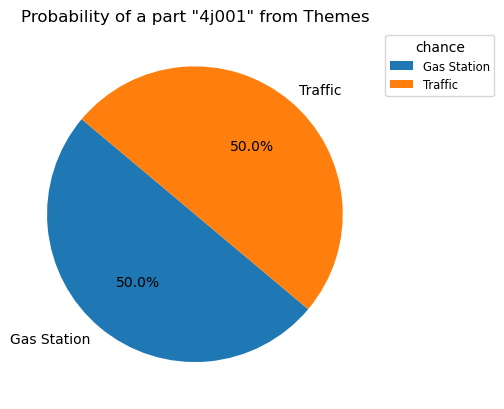

In [58]:
plot_change2(part_num='4j001')

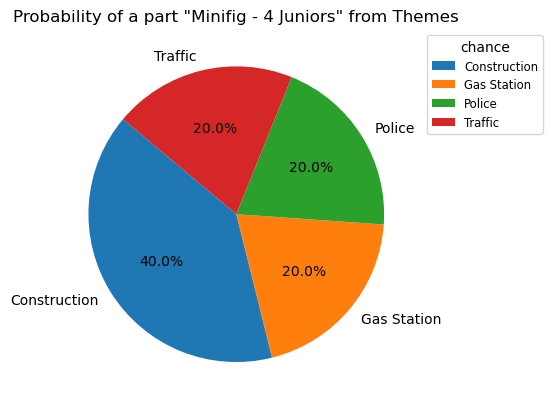

In [59]:
plot_change2(part_name = 'Minifig - 4 Juniors')

In [60]:
help(plot_change2)

Help on function plot_change2 in module __main__:

plot_change2(part_name=None, part_num=None)
    show the probability of this part's theme
    input: part_name or part_num
    output: piechart of probability of which theme does this part from



# Daisy: top 5 most common and rarest parts ?

In [61]:
# Find the 5 most common parts
part_counts = dataframes['inventory_parts']['part_num'].value_counts()
part_counts_df = part_counts.reset_index().head()
part_counts_df.columns = ['part_num','count']


# Merge with the parts DataFrame to get the names
common_parts = part_counts_df.merge(dataframes['parts'], on='part_num')


# Select only the relevant columns to display
common_parts = common_parts[['part_num', 'name', 'count']]

print(common_parts)

  part_num                               name  count
0     6141  Plate Round 1 x 1 with Solid Stud  16550
1     3023                        Plate 1 x 2  10359
2     3004                        Brick 1 x 2   8634
3     3020                        Plate 2 x 4   7566
4     3022                        Plate 2 x 2   7052


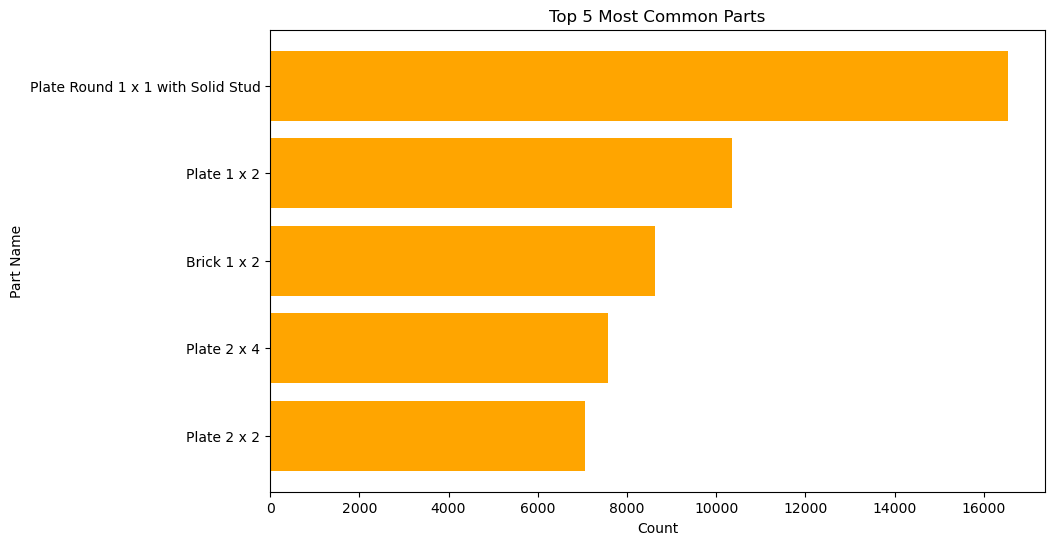

In [62]:
# Create a bar plot for the most common parts
plt.figure(figsize=(10, 6))
plt.barh(common_parts['name'], common_parts['count'], color='orange')
plt.xlabel('Count')
plt.ylabel('Part Name')
plt.title('Top 5 Most Common Parts')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()

In [63]:
# Find the 5 rarest parts
rarest_part_counts = dataframes['inventory_parts']['part_num'].value_counts().tail(5)
rarest_part_counts_df = rarest_part_counts.reset_index()
rarest_part_counts_df.columns = ['part_num','count']

# Merge with the parts DataFrame to get the names

rarest_parts = rarest_part_counts_df.merge(dataframes['parts'], left_on='part_num', right_on='part_num')

# Select only the relevant columns to display
rarest_parts = rarest_parts[['part_num', 'name', 'count']]

# Display the rarest parts data
print(rarest_parts)

      part_num                                               name  count
0     3754pb07              Brick 1 x 6 x 5 with Stone Wall Print      1
1  90638pr0010  Hero Factory Armor with Ball Joint Socket - Si...      1
2  90639pr0032  Hero Factory Armor with Ball Joint Socket - Si...      1
3        24666                       LEGO Puppy Dog with 1.5 Hole      1
4        20243  Sticker for Set 75090-2 - International Versio...      1


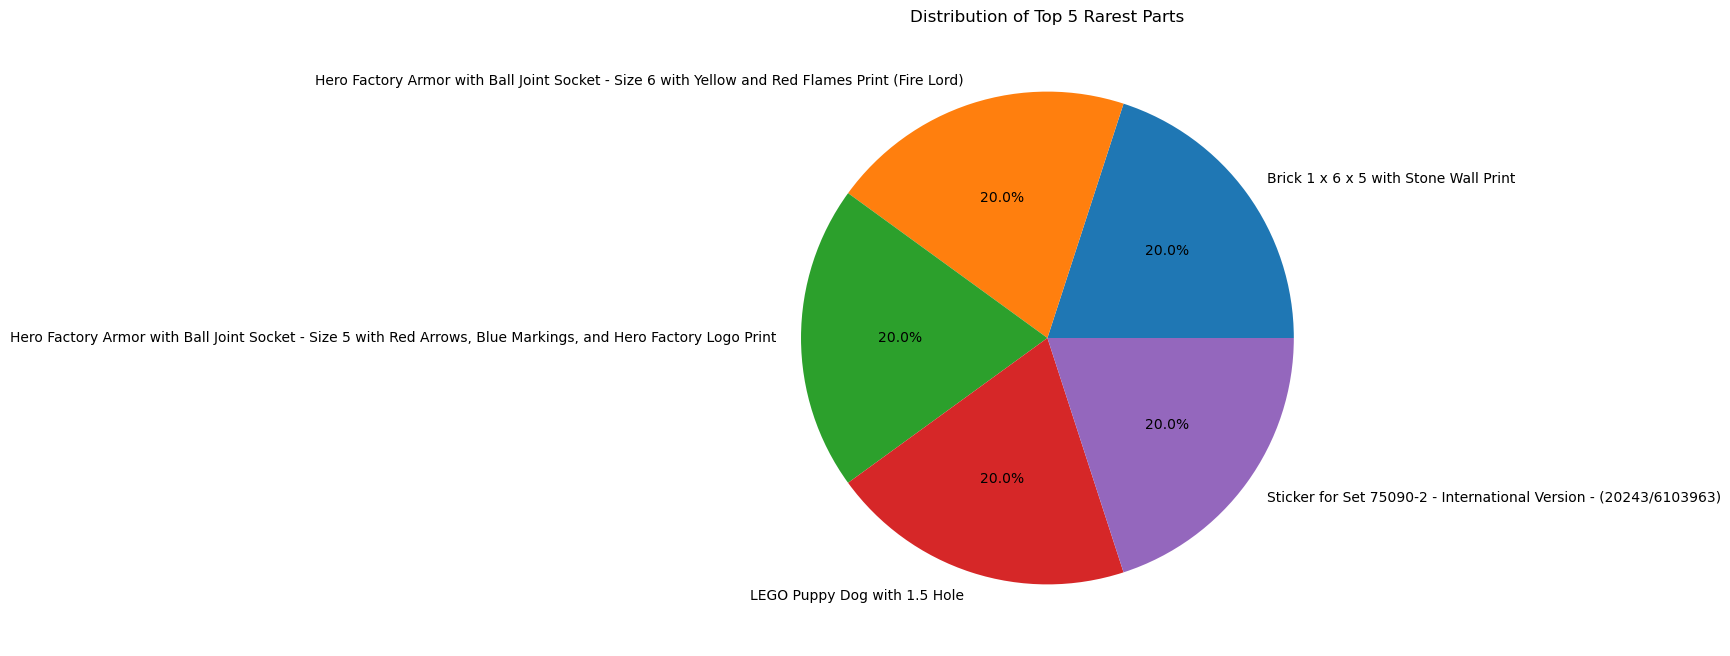

In [64]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rarest_parts['count'], labels=rarest_parts['name'], autopct='%1.1f%%')
plt.title('Distribution of Top 5 Rarest Parts')
plt.show()

In [65]:
# Merge inventory_parts with inventories, then merge the result with sets to get the year
inventory_parts_inventories = pd.merge(dataframes['inventory_parts'], dataframes['inventories'], left_on='inventory_id', right_on='id')
merged_data = pd.merge(inventory_parts_inventories, dataframes['sets'], on='set_num')

# Define the function to convert year to decade
def year_to_decade(year):
    if year < 1960:
        return 1950
    elif year < 1970:
        return 1960
    elif year < 1980:
        return 1970
    elif year < 1990:
        return 1980
    elif year < 2000:
        return 1990
    elif year < 2010:
        return 2000
    else:
        return 2010


In [66]:

# Apply the year_to_decade function to create a decade column
merged_data['decade'] = merged_data['year'].apply(year_to_decade)

# Group by decade and part_num, then count occurrences
decade_part_counts = merged_data.groupby(['decade', 'part_num']).size().reset_index(name='count')

# Find the top 5 parts for each decade
top_parts_per_decade = decade_part_counts.groupby('decade').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Merge with parts DataFrame to get the names of the parts
top_parts_per_decade_with_names = top_parts_per_decade.merge(dataframes['parts'], on='part_num', how='left')


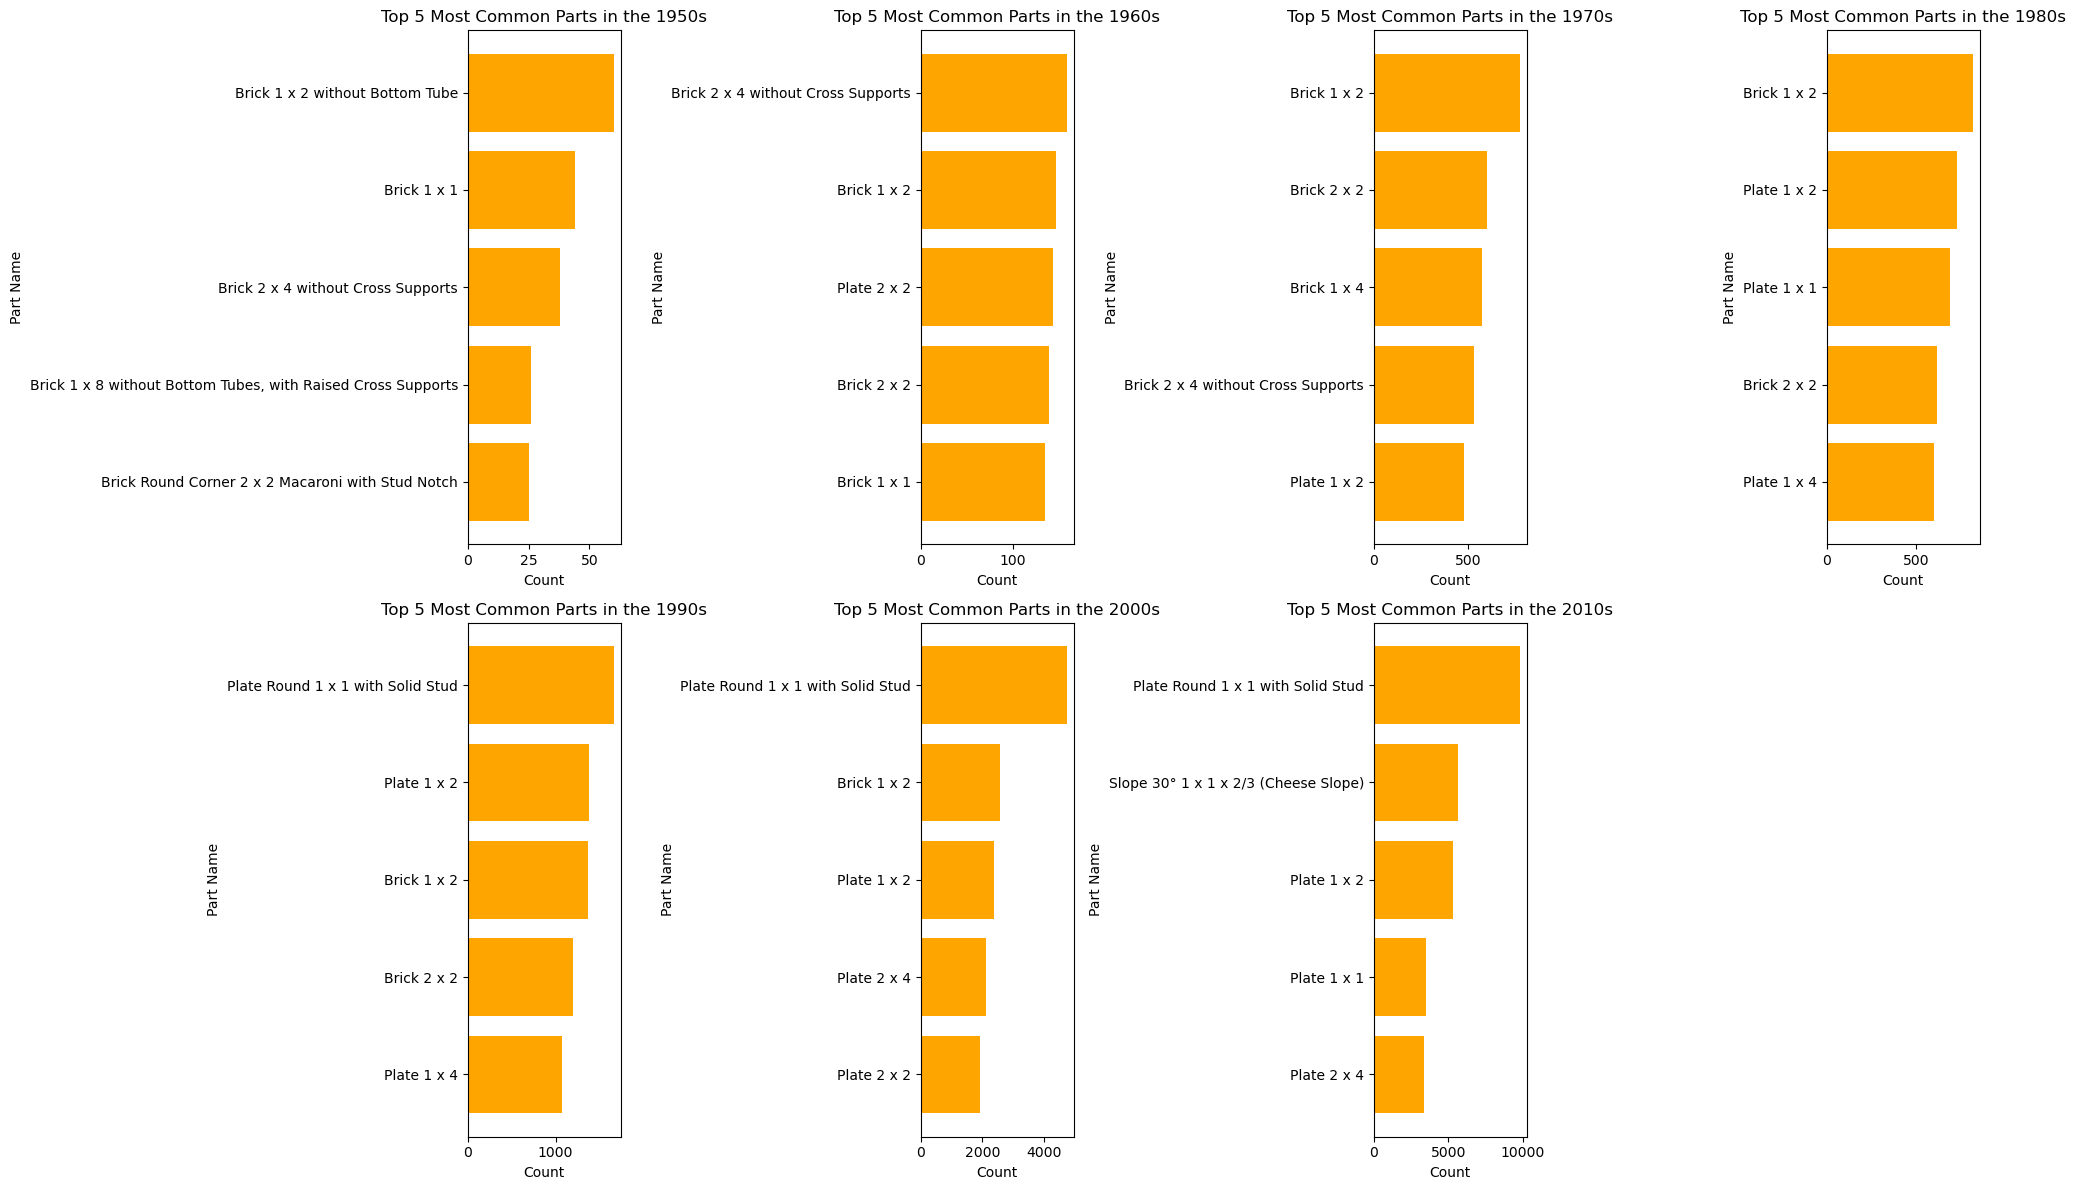

In [79]:
# Determine the number of unique decades
num_decades = len(top_parts_per_decade_with_names['decade'].unique())

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the unique decades and create a plot for each one
for i, decade in enumerate(top_parts_per_decade_with_names['decade'].unique()):
    subset = top_parts_per_decade_with_names[top_parts_per_decade_with_names['decade'] == decade]

    # Use the ith axes for plotting
    ax = axes[i]
    
    # Create the barh plot on the selected axes
    ax.barh(subset['name'], subset['count'], color='orange')
    ax.set_xlabel('Count')
    ax.set_ylabel('Part Name')
    ax.set_title(f'Top 5 Most Common Parts in the {decade}s')
    ax.invert_yaxis()  # Invert the y-axis to have the highest count at the top

# If the number of plots is less than the number of subplots, turn off the axes for the remaining subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout so plots do not overlap
plt.tight_layout()
# Display the figure with all subplots
plt.show()

In [69]:

# # Plotting per decade
# for decade in top_parts_per_decade_with_names['decade'].unique():
#     subset = top_parts_per_decade_with_names[top_parts_per_decade_with_names['decade'] == decade]
#     plt.figure(figsize=(10, 6))
#     plt.barh(subset['name'], subset['count'], color='orange')
#     plt.xlabel('Count')
#     plt.ylabel('Part Name')
#     plt.title(f'Top 5 Most Common Parts in the {decade}s')
#     plt.gca().invert_yaxis()
#     plt.show()


# Nandar: Overall top 5 most popular theme

In [70]:
dataframes['themes'].head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [71]:
dataframes['sets'].head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [72]:
merged = pd.merge(dataframes['sets'], dataframes['themes'], left_on = 'theme_id', right_on = 'id')
merged.head()


,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0


combine multiple themes with similar names into one:

In [73]:
def merge_themes(df, col_name, themes_list):
    for i in themes_list:
        df[col_name] = df[col_name].apply(lambda x: i if x.startswith(i) else x)
    return df

themes = ["Star Wars", "Disney", "Planet Series", "Spider-Man", "Marvel",
          "Aquaraiders", "Series", "Knights Kingdom", "Matoran", "LEGO",
          "Legoland", "Space Police", "The LEGO", "The Simpsons", "Toa", "Basic"]

merge_themes(merged, "name_y", themes)

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0
...,...,...,...,...,...,...,...,...
11668,K6762-1,Western Kit,2002,475,3,475,Western,NaN
11669,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,4,264,Indiana Jones,NaN
11670,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,430,Pirates,425.0
11671,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,430,Pirates,425.0


In [74]:
merged['name_y'].value_counts().head(5)

Star Wars       634
Supplemental    496
Basic           455
Technic         435
Series          409
Name: name_y, dtype: int64

Text(0.5, 1.0, 'Top 5 most popular theme')

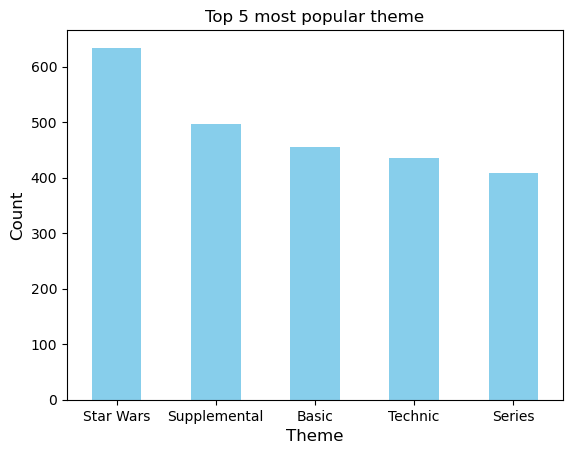

In [75]:
merged['name_y'].value_counts().head(5).plot.bar(color = 'skyblue')
plt.xlabel("Theme", fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel("Count", fontsize = 12)
plt.title("Top 5 most popular theme")

for each decade :

In [76]:
def year_to_decade (year):
    if year < 1960:
        return 1950
    elif year < 1970:
        return 1960
    elif year < 1980:
        return 1970
    elif year < 1990:
        return 1980
    elif year < 2000:
        return 1990
    elif year < 2010:
        return 2000
    else:
        return 2010

merged['decade'] = merged['year'].apply(year_to_decade)

In [77]:
merged.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id,decade
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0,1970
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0,1970
2,2181-1,Infomaniac,1997,84,4,84,Supplemental,67.0,1990
3,300-1,T-Junction Road Plates,1978,84,2,84,Supplemental,67.0,1970
4,301-1,Curved Road Plates,1978,84,2,84,Supplemental,67.0,1970


C:\Users\wudan\AppData\Local\Temp\ipykernel_18192\1485786790.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for decade, decade_data in decade_grouped:


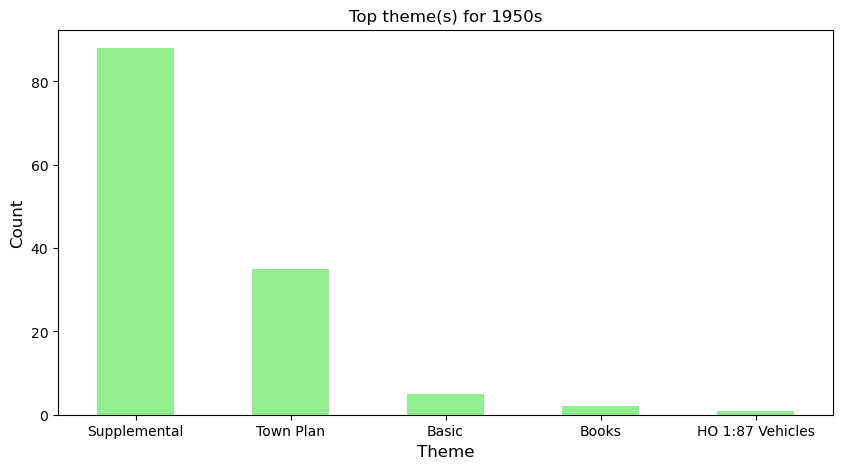

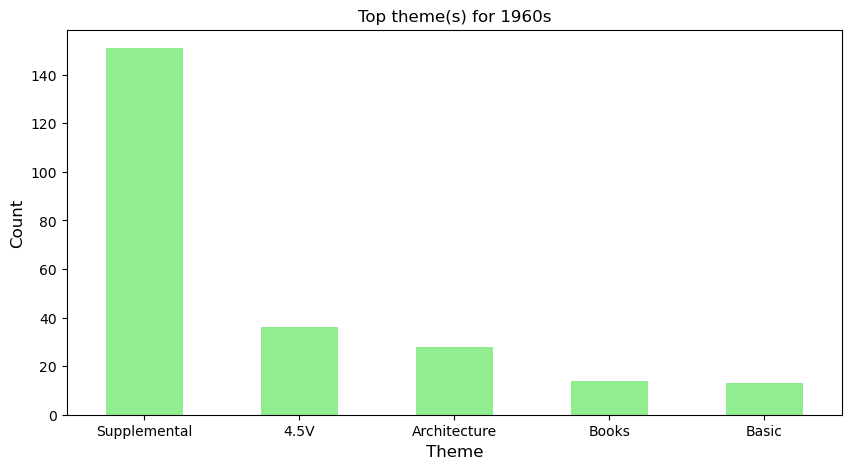

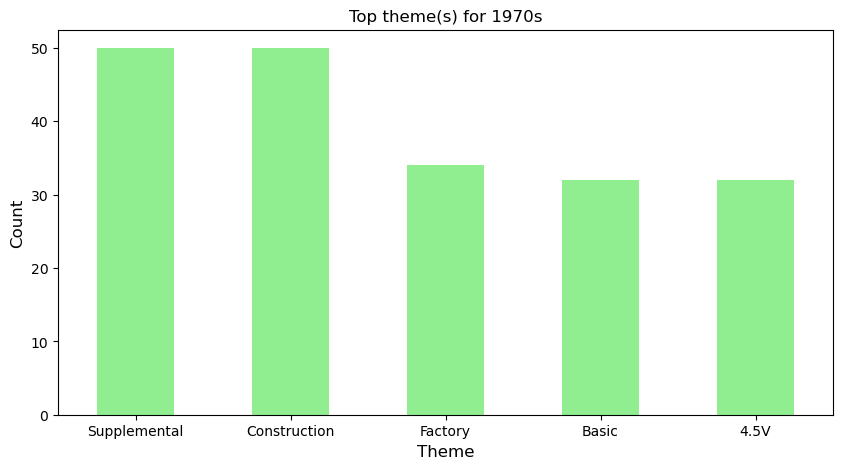

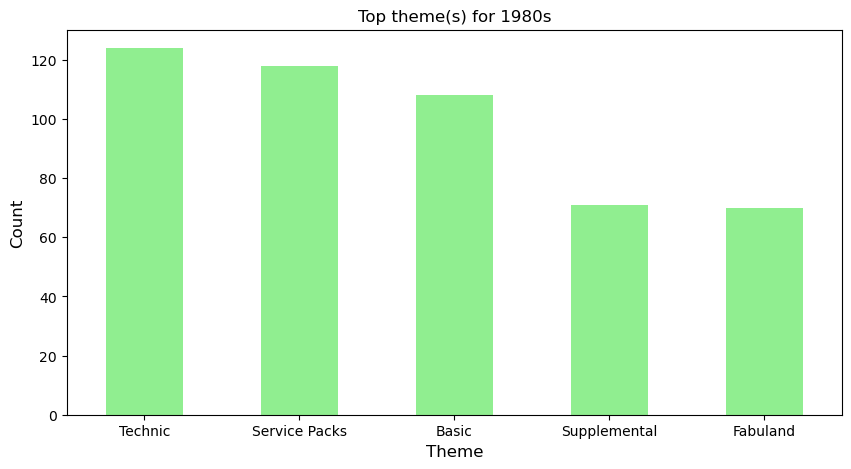

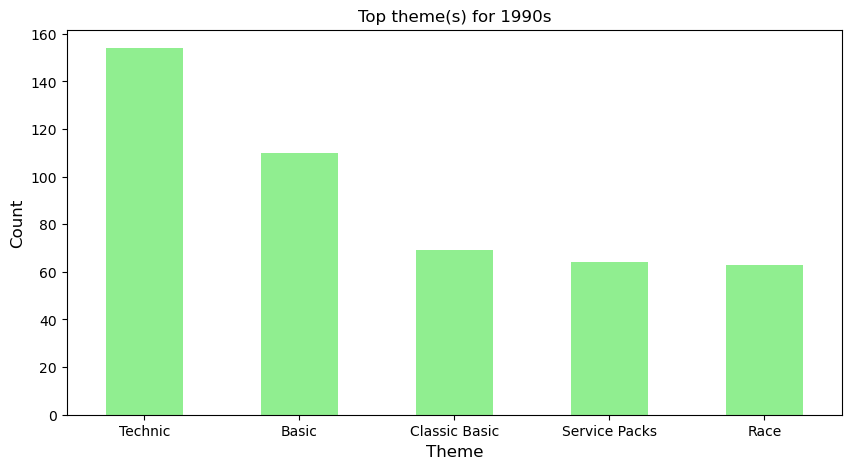

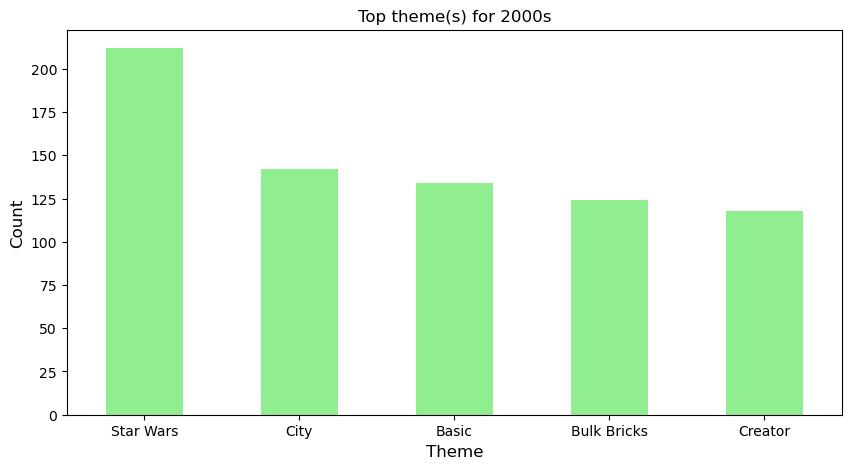

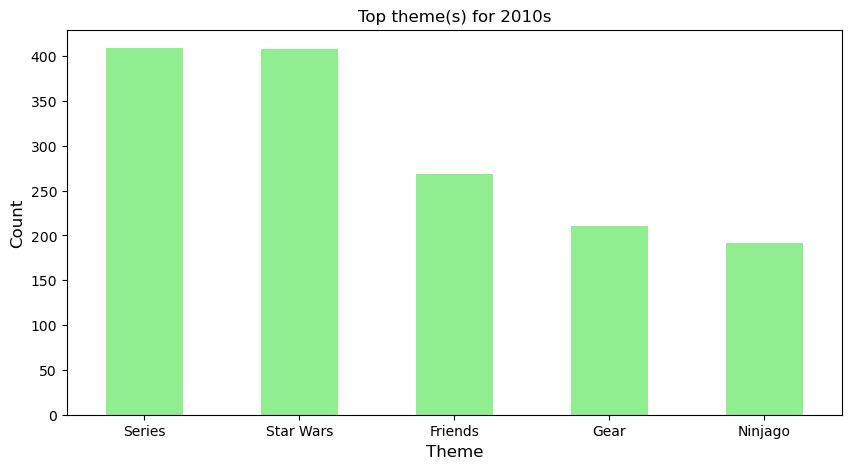

In [80]:
decade_grouped = merged.groupby(by=["decade"])

for decade, decade_data in decade_grouped:
    
    plt.figure(figsize=(10,5))
    top5_names_per_year = decade_data['name_y'].value_counts().head(5)
    top5_names_per_year.plot.bar(color = 'lightgreen')
    plt.xlabel("Theme", fontsize = 12)
    plt.xticks(rotation = 0)
    plt.ylabel("Count", fontsize = 12)
    plt.title(f"Top theme(s) for {int(decade)}s")



C:\Users\wudan\AppData\Local\Temp\ipykernel_18192\616563405.py:15: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (decade, decade_data) in enumerate(decade_grouped):


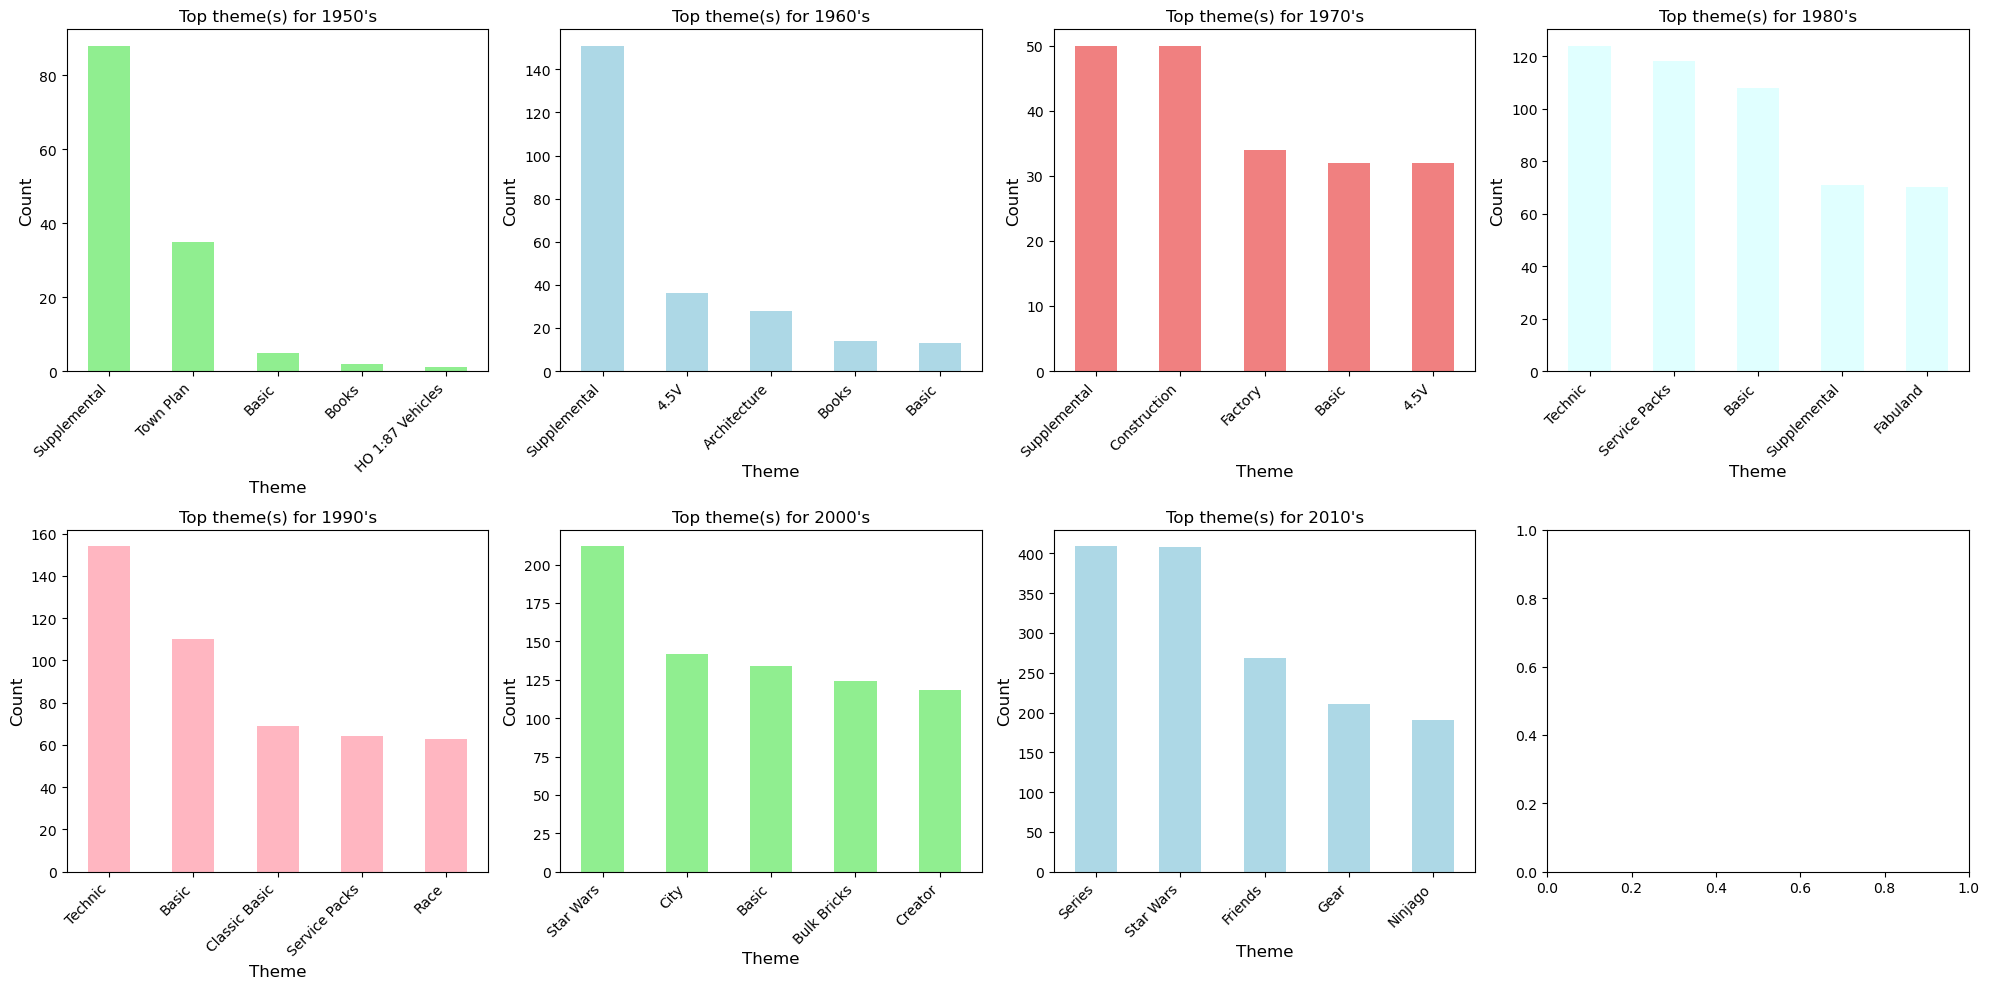

In [81]:
# Use subplots ,so all the plots can show in the one slide
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightcyan', 'lightpink']

# Define the number of subplots (2x4)
num_rows = 2
num_cols = 4

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each decade and corresponding data
for i, (decade, decade_data) in enumerate(decade_grouped):
    # Plot the data on the ith subplot
    top5_names_per_year = decade_data['name_y'].value_counts().head(5)
    ax = axs[i]
    top5_names_per_year.plot.bar(color=colors[i % len(colors)], ax=ax)
    ax.set_xlabel("Theme", fontsize=12)
    ax.set_xticklabels(top5_names_per_year.index, rotation=45, ha='right')
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Top theme(s) for {int(decade)}'s")

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()


# Pinky: Average number of lego pieces per box

## Question: How many parts are there in a set on average?

In [82]:
dataframes['sets'].head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [83]:
lego_set = dataframes['sets']

In [84]:
num_parts = pd.DataFrame(dataframes['sets']["num_parts"])
round(num_parts.describe())

,num_parts
count,11673.0
mean,162.0
std,330.0
min,-1.0
25%,10.0
50%,45.0
75%,172.0
max,5922.0


In [85]:
two_pieces_and_above = pd.DataFrame(lego_set[lego_set['num_parts']>=2]['num_parts']) #defining a set as 2 pieces and above
round(two_pieces_and_above.describe())

,num_parts
count,10912.0
mean,174.0
std,339.0
min,2.0
25%,16.0
50%,51.0
75%,189.0
max,5922.0


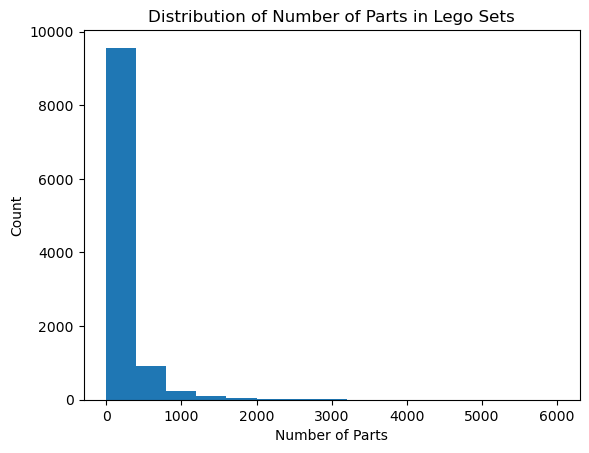

In [86]:
plt.hist(two_pieces_and_above, bins=15, range=(0,6000)) 
plt.xlabel('Number of Parts')
plt.ylabel('Count')
plt.title('Distribution of Number of Parts in Lego Sets')
plt.show()

In [87]:
#distribution based on year
set_year = pd.DataFrame(lego_set[lego_set['num_parts']>=2]['year'].value_counts())
set_year.reset_index(inplace=True)
set_year.columns = ['year', 'count']
set_year

,year,count
0,2014,614
1,2015,596
2,2016,580
3,2012,570
4,2013,542
...,...,...
61,1964,8
62,1950,7
63,1959,3
64,1953,3


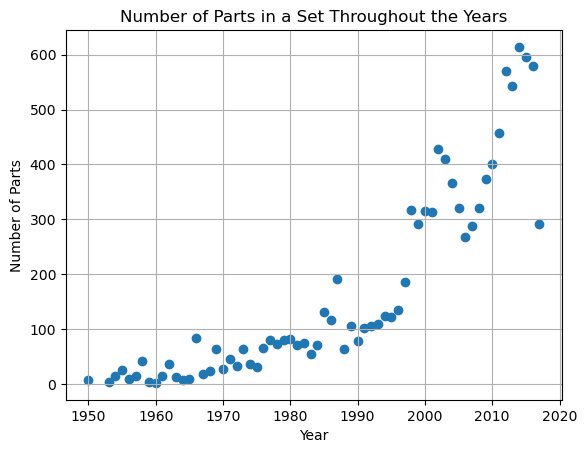

In [88]:
plt.scatter(set_year['year'], set_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Number of Parts in a Set Throughout the Years')
plt.grid(True)
plt.show()

In [89]:
#Average number of parts in a set
mean_piece = round(two_pieces_and_above.mean())
print (f"Average number of parts in a set is {mean_piece} pieces.")

Average number of parts in a set is num_parts    174.0
dtype: float64 pieces.
